<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://bsethwalker.github.io/assets/img/clemson_paw.png"> </div>

## Week 6: Regressions

**Clemson University**<br>
**Spring 2023**<br>
**Instructor(s):** Carlos Toxtli Hernandez <br>
**Created by:** Ravi Teja Kodali <br>


---



In [63]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [64]:
import warnings
warnings.filterwarnings('ignore')

## Learning Goals

By the end of this lab, you should be able to:
* Feel comfortable with splitting the training and validation sets
* Feel comfortable with model selection
* Feel comfortable with selecting the best model out of selected ones

In [105]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance


# 0 - Outlier Detection

Outiler: Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

There are different ways to detect Outliers. One of the common technique is Interquartile Range.

Each dataset can be divided into quartiles. The first quartile point indicates that 25% of the data points are below that value whereas second quartile is considered as median point of the dataset. The inter quartile method finds the outliers on numerical datasets by following the procedure below

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR= Q3-Q1.
Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
Any data point outside this range is considered as outlier and should be removed for further analysis.
The concept of quartiles and IQR can best be visualized from the boxplot. It has the minimum and maximum point defined as Q1–1.5*IQR and Q3+1.5*IQR respectively. Any point outside this range is outlier.



https://drive.google.com/file/d/1mDrakfRfsMeQjIVZW2FjLuGott0fNAXk/view?usp=share_link

In [106]:
df=pd.read_csv('data/housing.csv')
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


In [107]:
# Description of the dataset
print(df.describe())

                 id         price        sqfeet           beds          baths  \
count  3.849770e+05  3.849770e+05  3.849770e+05  384977.000000  384977.000000   
mean   7.040982e+09  8.825722e+03  1.059900e+03       1.905345       1.480718   
std    8.800376e+06  4.462200e+06  1.915076e+04       3.494572       0.618061   
min    7.003808e+09  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    7.035979e+09  8.050000e+02  7.500000e+02       1.000000       1.000000   
50%    7.043320e+09  1.036000e+03  9.490000e+02       2.000000       1.000000   
75%    7.048426e+09  1.395000e+03  1.150000e+03       2.000000       2.000000   
max    7.051292e+09  2.768307e+09  8.388607e+06    1100.000000      75.000000   

        cats_allowed   dogs_allowed  smoking_allowed  wheelchair_access  \
count  384977.000000  384977.000000    384977.000000      384977.000000   
mean        0.726890       0.707918         0.731771           0.082111   
std         0.445557       0.454721         0

In [108]:
# This is the function to remove special characters.
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

Text(0, 0.5, 'Price ($)')

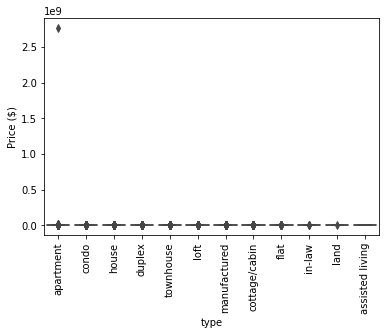

In [109]:
# See the initial distribution in boxplots.
df=df[['price','type']]
df=pd.DataFrame(df)

df.price = df.price.apply(remove_sign,sign='$')
sns.boxplot(y='price', x='type',data=df)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [131]:
# Create function to implement IQR method.

#Inter Quartile Range

from scipy import stats

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

def remove_outlier_ZScore(df):
    df_final=df[(np.abs(stats.zscore(df)) < 3)]
    return df_final

![IQR](https://editor.analyticsvidhya.com/uploads/15066IQR-Boxplot.png)

In [133]:
len(df)

384977

In [134]:
len(remove_outlier_ZScore(df.price))

384973

In [135]:
len(remove_outlier_IQR(df.price))

366255

Text(0, 0.5, 'Price ($)')

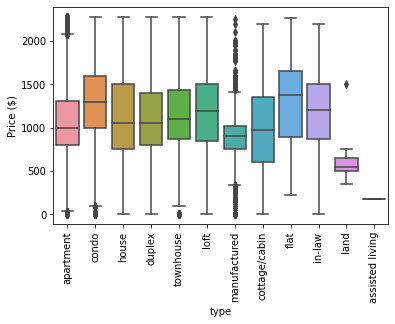

In [71]:
# Revisit the boxplot after outlier removal. The indices of the bad data points are determined and those are removed from the initial dataset.
# Creating the box plot 
df_outlier_removed=remove_outlier_IQR(df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
# Creating the box plot   
sns.boxplot(y='price', x='type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

As seen in the boxplot, the majority of the outliers are removed.

Check number of outliers removed. The total number of outliers determined by this process is 18722.

In [136]:
len(ind_diff)

18722

# Notes:
IQR or Hampel method are very successful for extreme outliers with a single pattern whereas DBSCAN is a better choice if we have data of different patterns. Let’s say if we have a linear data as well as a circular data, DBSCAN will be able to differentiate the samples into different groups. 

<a class="anchor" id="third-bullet"></a>
## 1 - Model Selection

Model selection is the task of selecting a model from among various candidates on the basis of performance criterion to choose the best one. In the context of learning, this may be the selection a statistical model from a set of candidate models, given data. The goal of model selection is to find a model that can accurately predict new, unseen data while avoiding overfitting, which occurs when a model is too complex and fits the training data too closely.


### Model Selection with Wine Dataset
We first examine on Wine dataset which is a common one in Machine learning datsets.


In [137]:
# Load the Iris dataset and below function will print the description of the dataset
wine = load_wine()
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1


#### Steps for Model Selection
The wine dataset is a multiclass classification problem that involves predicting the type of wine (one of three possible classes) based on 13 numerical features. Here is a general outline of how you might approach model selection for this problem:

1. Define the problem: In this case, the problem is to classify the type of wine based on 13 numerical features. The performance metric we want to optimize is classification accuracy.

2. Select a set of candidate models: Choose a set of models that are appropriate for the problem and the data. For example, we might consider logistic regression, decision trees, random forests, support vector machines, and neural networks.

3. Split the data: Split the wine dataset into training, validation, and test sets. We might use a 60/20/20 split, for example.

4. Train and evaluate each model: Train each candidate model on the training set and evaluate its performance on the validation set using the chosen performance metric (classification accuracy). For example, we might use grid search to explore different hyperparameters for each model, such as the regularization strength for logistic regression or the number of trees in a random forest. We would then evaluate the performance of each model using k-fold cross-validation on the training set and choose the best hyperparameters based on the average validation accuracy.

5. Select the best model: Compare the performance of each model on the validation set and choose the model with the best performance. In this case, we might choose the random forest model with the best validation accuracy. The final model is then evaluated on the test set to estimate its generalization performance.

By following this process, we can ensure that we select the best model for the wine dataset and avoid overfitting to the training data.



### Building models
In this part, we will select the models and build them.

The snippets of code below implement the above steps for the Model Selection.  Let's walk through the code.



Lets split the data as Training set and Valitadion set.


In [142]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [143]:
# Split the data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

Lets choose the candidate models for evaluation. Here we are going with Logistic Regression,
Decision Tree, Support Vector classification and Random Forest.

In [144]:
# Define a list of candidate models
models = [
    ('logistic', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

In [145]:
# Define a dictionary of hyperparameters for each model
params = {
    'logistic': {'C': [0.1, 1.0, 10.0]},
    'decision_tree': {'max_depth': [None, 3, 5]},
    'random_forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 3, 5]},
    'svm': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    
}


In [146]:
# Iterate over each model and perform grid search to find the best hyperparameters
best_model = None
best_accuracy = 0.0
for name, model in models:
    grid_search = GridSearchCV(model, params[name], cv=5)
    grid_search.fit(X_trainval, y_trainval)
    accuracy = grid_search.score(X_val, y_val)
    if accuracy > best_accuracy:
        best_model = grid_search.best_estimator_
        best_accuracy = accuracy
    print(f"{name}: validation accuracy = {accuracy}")

logistic: validation accuracy = 0.9722222222222222
decision_tree: validation accuracy = 1.0
random_forest: validation accuracy = 1.0
svm: validation accuracy = 0.9722222222222222


In [147]:
# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Best model ({type(best_model).__name__}): test accuracy = {test_accuracy}")

Best model (DecisionTreeClassifier): test accuracy = 0.9444444444444444


This code defines a list of candidate models (logistic regression, decision tree, random forest, SVM, and neural network), as well as a dictionary of hyperparameters for each model. It then iterates over each model, performs grid search to find the best hyperparameters, and evaluates the performance of each model on the validation set. The best model is selected based on the highest validation accuracy, and the final model is evaluated on the test set to estimate its generalization performance.

<div class="Histogram"></div>
These histograms show the distribution of feature values for the first two features of the Wine dataset.

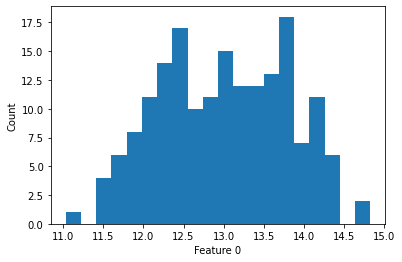

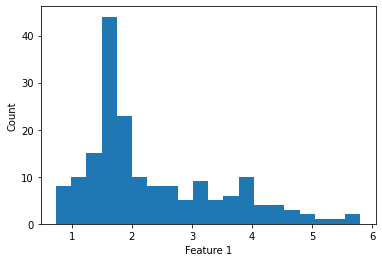

In [148]:
# Plot histograms of feature values for the first two features
plt.hist(wine.data[:, 0], bins=20)
plt.xlabel('Feature 0')
plt.ylabel('Count')
plt.show()

plt.hist(wine.data[:, 1], bins=20)
plt.xlabel('Feature 1')
plt.ylabel('Count')
plt.show()


This scatter plot shows the relationship between two features of the Wine dataset, with different colors indicating the target classes.

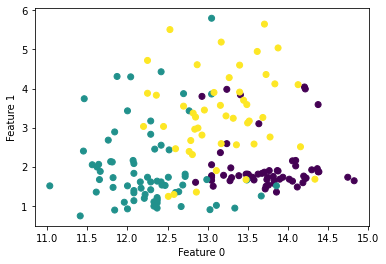

In [149]:
# Plot a scatter plot of two features
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

This code uses the pairplot function from the seaborn library to create a scatter plot matrix of all pairwise combinations of features in the Wine dataset. The hue parameter is set to the target variable, which is used to color-code the points based on their target class. The diag_kind parameter is set to 'hist', which plots histograms of each feature on the diagonal instead of scatter plots.

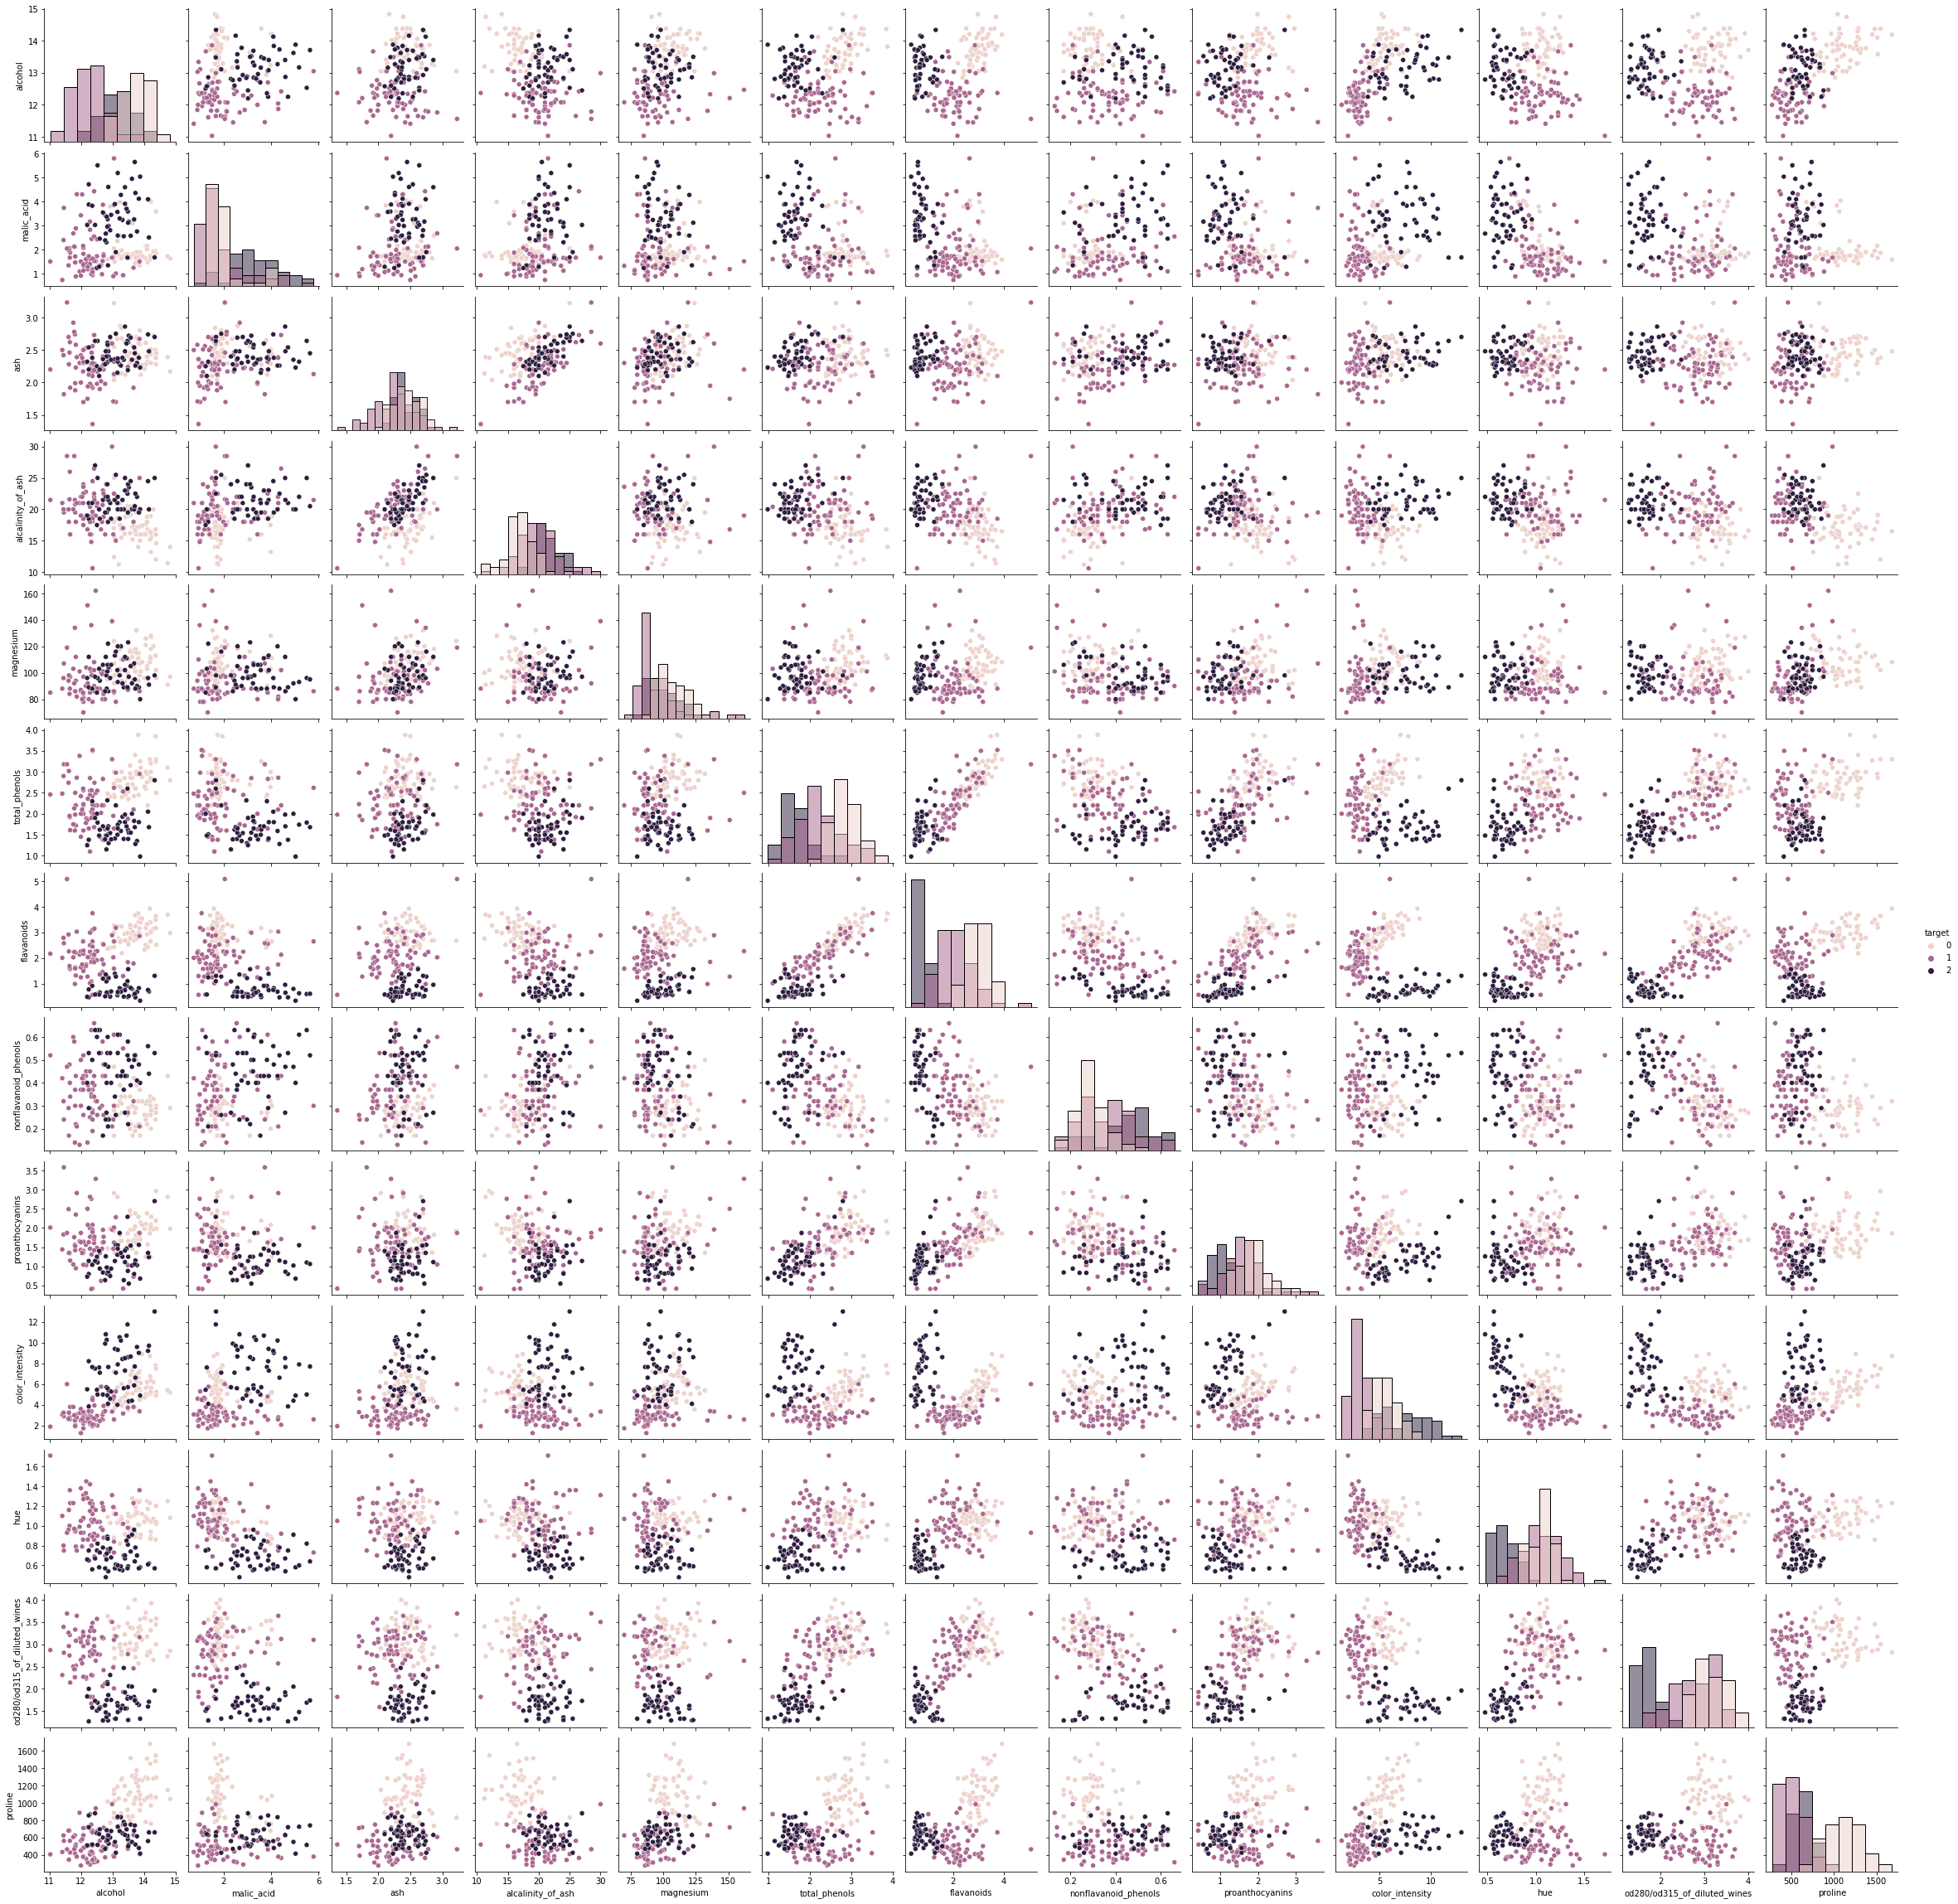

In [150]:
# Pair wise scatter plot
import seaborn as sns
import pandas as pd

# Load the Wine dataset
wine = load_wine()

# Create a DataFrame from the Wine dataset
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Create a pairwise scatter plot
sns.pairplot(data=df, hue='target', diag_kind='hist')
plt.show()


This confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class of the Wine dataset, based on the predictions of the best model on the validation set.

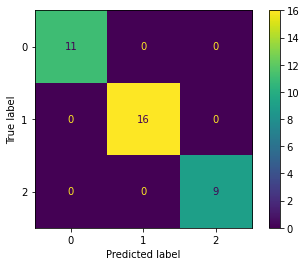

In [83]:
from sklearn.metrics import plot_confusion_matrix

# Plot a confusion matrix for the best model
plot_confusion_matrix(best_model, X_val, y_val)
plt.show()


This heatmap shows the pairwise correlations between the features of the Wine dataset.

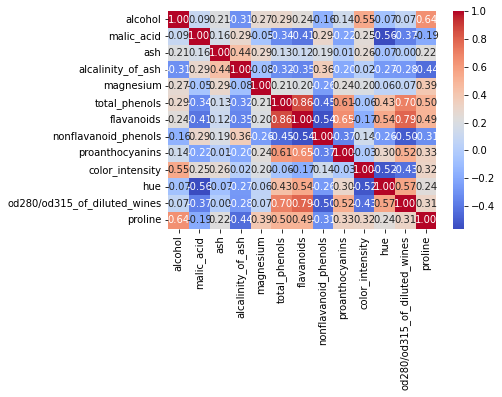

In [84]:
# Compute the correlation matrix
corr = np.corrcoef(wine.data.T)

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', xticklabels=wine.feature_names,
            yticklabels=wine.feature_names, annot=True, fmt='.2f')
plt.show()


This learning curve shows how the accuracy of the best model improves as the size of the training set increases, based on cross-validation.

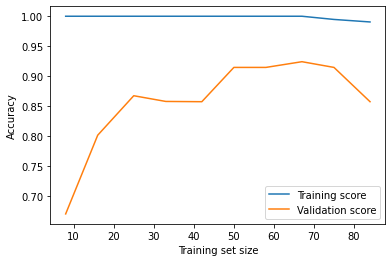

In [85]:
# Plot a learning curve for the best model

train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This scatter plot shows the projection of the Wine dataset onto the first two principal components, with different colors indicating the target classes.

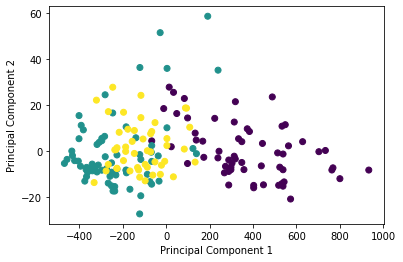

In [86]:
# Fit PCA to the Wine dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine.data)

# Plot a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


This bar chart shows the feature importances of the best model based on permutation importance, which measures the decrease in accuracy when a feature is randomly permuted.

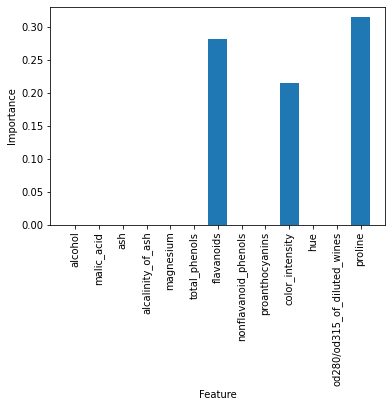

In [87]:
# Compute the feature importances using permutation importance
result = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state=0)
importances = result.importances_mean

# Plot a bar chart of the feature importances
plt.bar(wine.feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

We loaded the wine dataset and then extracted the features (X) and target (y) from the dataset. Next, we use scikit-learn's SelectKBest class to select the 5 best features using the chi-squared statistical test (chi2). Finally, we transform the original feature matrix X into the K-best feature matrix X_kbest using the fit_transform method of the SelectKBest object.

Note that in this example, we set k=5, which means we're selecting the 5 best features. You can adjust this value to select a different number of features depending on your needs.

In [88]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, chi2

# Load the wine dataset
wine = load_wine()

# Extract the features and target
X, y = wine.data, wine.target

# Use chi-squared statistical test to select the K-best features
selector = SelectKBest(chi2, k=5)
X_kbest = selector.fit_transform(X, y)

# Print the indices of the selected features
print(selector.get_support(indices=True))
wine.feature_names

[ 3  4  6  9 12]


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# Cross Validation
Now lets see some problems in cross validation


Cross-validation is a technique used in machine learning to evaluate the performance of a model on an independent dataset. It involves partitioning the original dataset into multiple subsets, called folds, and training the model on a subset of the data while using the remaining data for validation. This process is repeated multiple times, with each fold used once for validation and the other folds used for training.

Cross-validation is a useful technique because it provides a more robust estimate of the model's performance than a single train-test split. By using multiple splits of the data, cross-validation reduces the risk of overfitting or underfitting to a particular dataset.

In [163]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()

# Set X and y variables
X = iris.data
y = iris.target

# Initialize Logistic Regression object
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Fit the model on the training set
logreg.fit(X_train, y_train)

# Predict the labels of validation set
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score:", acc)


Accuracy score: 0.9333333333333333


# Lets Play with Iris dataset.

In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()

# Set X and y variables
X = iris.data
y = iris.target

# Define number of folds for cross-validation
n_folds = 5

# Initialize KFold object
kf = KFold(n_splits=n_folds, shuffle=True)

# Initialize Logistic Regression object
logreg = LogisticRegression()

# Initialize empty list to store accuracy scores
scores = []

# Loop through each fold and train the model
for train_idx, val_idx in kf.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Predict the labels of validation set
    y_pred = logreg.predict(X_val)

    # Calculate the accuracy score and append to scores list
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

# Calculate the average accuracy score
avg_score = sum(scores) / len(scores)

print("Cross-validation average accuracy score:", avg_score)


Cross-validation average accuracy score: 0.9666666666666668


# Notes:
In this example, we load the iris dataset and split it into X and y variables. We then define the number of folds for cross-validation and initialize a KFold object. We also initialize a Logistic Regression object and an empty list to store accuracy scores.
We loop through each fold, split the data into training and validation sets, fit the logistic regression model on the training set, and predict the labels of the validation set. We then calculate the accuracy score and append it to the scores list.

After all the folds are processed, we calculate the average accuracy score by summing the scores and dividing by the number of folds. Finally, we print the average accuracy score.

In [156]:
scores

[0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0]

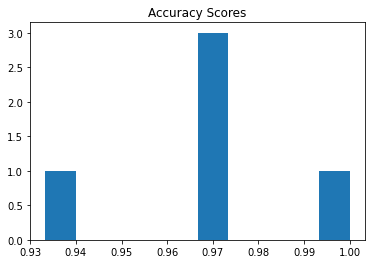

In [91]:
# Create a histogram of accuracy scores
plt.hist(scores, bins=10)
plt.title('Accuracy Scores')
plt.show()


The above code will create a box plot that shows the distribution of accuracy scores for each fold. The box plot will show the median (line in the box), the interquartile range (box), and the range of the data (whiskers).

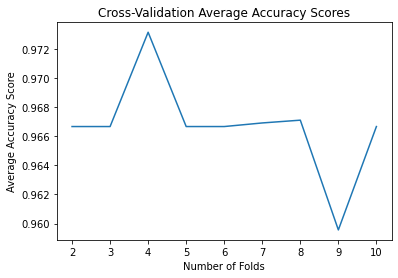

In [92]:
# Initialize empty list to store average scores
avg_scores = []

# Loop through different values of n_folds
for n_folds in range(2, 11):
    kf = KFold(n_splits=n_folds, shuffle=True)
    scores = []
    for train_idx, val_idx in kf.split(X):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)
    avg_score = sum(scores) / len(scores)
    avg_scores.append(avg_score)

# Create a line plot of average scores
plt.plot(range(2, 11), avg_scores)
plt.title('Cross-Validation Average Accuracy Scores')
plt.xlabel('Number of Folds')
plt.ylabel('Average Accuracy Score')
plt.show()


The above code will create a line plot that shows how the cross-validation average accuracy score changes as the number of folds increases. The line plot will show if increasing the number of folds improves or decreases the model's performance.

# K Fold Cross Validation

k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

The algorithm of the k-Fold technique:

1. Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
2. Split the dataset into k equal (if possible) parts (they are called folds)
3. Choose k – 1 folds as the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

In [93]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()

# Set X and y variables
X = iris.data
y = iris.target

# Define number of folds for cross-validation
k = 5

# Initialize KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize Logistic Regression object
logreg = LogisticRegression()

# Initialize empty list to store accuracy scores
scores = []

# Loop through each fold and train the model
for train_idx, val_idx in kf.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Predict the labels of validation set
    y_pred = logreg.predict(X_val)

    # Calculate the accuracy score and append to scores list
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

# Calculate the average accuracy score
avg_score = sum(scores) / len(scores)

print("Cross-validation average accuracy score:", avg_score)


Cross-validation average accuracy score: 0.9733333333333333


In the code, we set k to 5 for 5-fold cross-validation. We then initialize a KFold object with n_splits parameter set to k and shuffle parameter set to True to shuffle the data before splitting it into folds.

We looped through each fold, split the data into training and validation sets, fit the logistic regression model on the training set, and predict the labels of the validation set. We then calculate the accuracy score and append it to the scores list.

After all the folds are processed, we calculate the average accuracy score by summing the scores list and dividing by the number of folds. Finally, we print the average accuracy score.

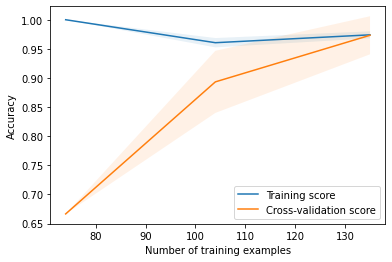

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


The above code will plot the learning curves for the model. The learning curves plot the accuracy of the model on the training and validation sets as a function of the number of training examples. If the gap between the training and validation scores is large, it could indicate overfitting.

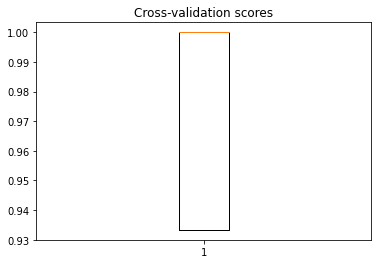

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
plt.boxplot(scores)
plt.title('Cross-validation scores')
plt.show()


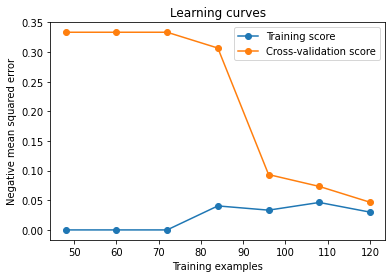

In [96]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kf, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Negative mean squared error')
plt.title('Learning curves')
plt.show()


Learning curves: Learning curves show the training and validation scores for a model as a function of the size of the training set. By plotting learning curves for each fold of the cross-validation, you can get an idea of how the model's performance changes as the amount of training data increases.
python


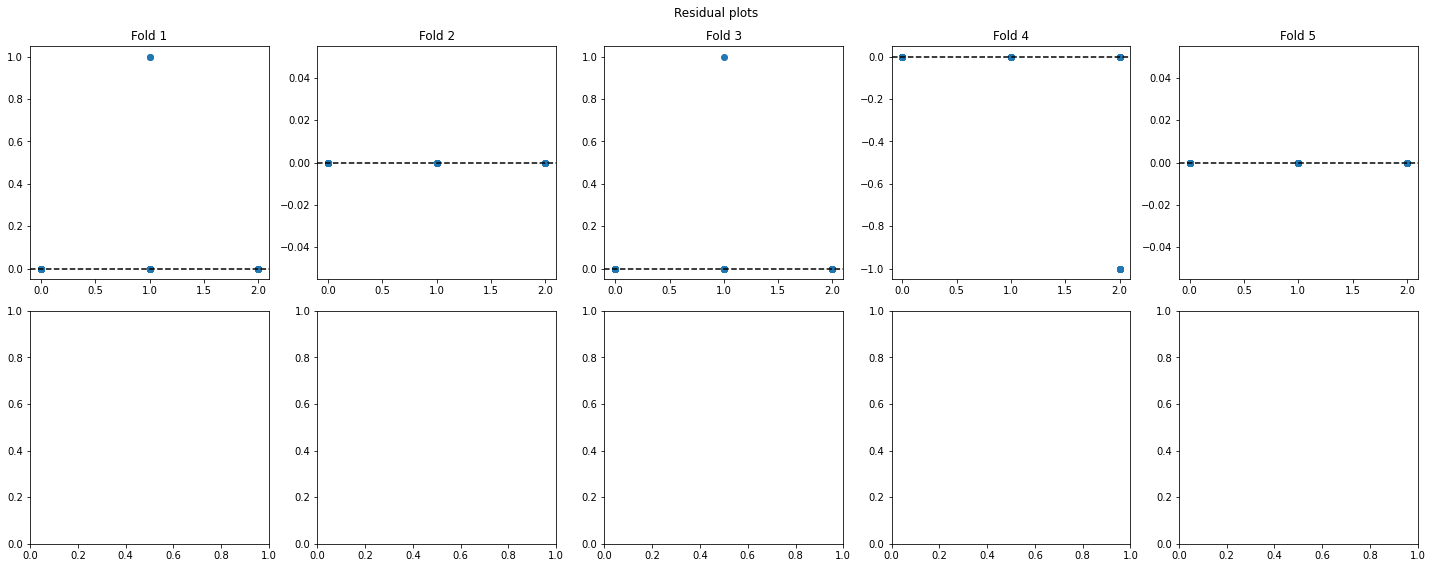

In [97]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    axs[i].scatter(y_test, y_pred - y_test)
    axs[i].axhline(y=0, color='black', linestyle='--')
    axs[i].set_title(f'Fold {i+1}')

plt.suptitle('Residual plots')
plt.tight_layout()
plt.show()


Residual plots: Residual plots show the difference between the predicted and actual values as a function of the actual values. By plotting residual plots for each fold of the cross-validation, you can get an idea of how well the model is fitting the data and whether there are any patterns in the residuals.

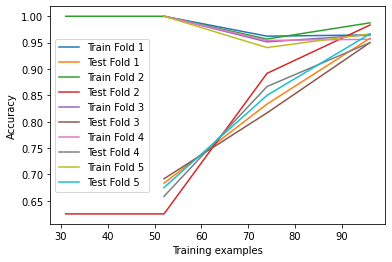

In [98]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots()

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    ax.plot(train_sizes, train_mean, label=f'Train Fold {i+1}')
    ax.plot(train_sizes, test_mean, label=f'Test Fold {i+1}')
    
ax.set_xlabel('Training examples')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


This code will create learning curves for each fold of the k-fold cross-validation. The learning curves can help to identify if the model is overfitting or underfitting for any particular fold.

These visualizations can help to diagnose issues with the model or the data and improve the performance of the model.

# Leave-One-Out Cross Validation

In [99]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

loo = LeaveOneOut()

model = LogisticRegression()

accuracy_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(f'Mean accuracy: {np.mean(accuracy_scores):.2f}')


Mean accuracy: 0.97


# Notes:
In this example, we use the LeaveOneOut class to split the data into training and testing sets for each sample in the dataset. We then fit the logistic regression model on the training data and compute the accuracy score on the testing data. Finally, we calculate the mean accuracy score across all the samples in the dataset.

Note that LOOCV can be very computationally expensive, especially for larger datasets, since it involves fitting the model n times (where n is the number of samples in the dataset). Therefore, it is generally recommended to use k-fold cross-validation instead, unless the dataset is very small.

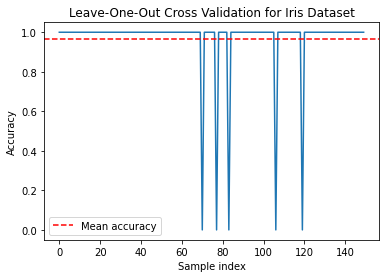

In [100]:


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

loo = LeaveOneOut()

model = LogisticRegression()

accuracy_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy scores for each sample
plt.plot(np.arange(len(accuracy_scores)), accuracy_scores)
plt.axhline(np.mean(accuracy_scores), color='r', linestyle='--', label='Mean accuracy')
plt.xlabel('Sample index')
plt.ylabel('Accuracy')
plt.title('Leave-One-Out Cross Validation for Iris Dataset')
plt.legend()
plt.show()


In the above example, we plot the accuracy score for each individual sample in the dataset, as well as a horizontal line representing the mean accuracy score across all the samples. This can be a useful way to visualize the performance of the model on each individual sample, and to detect any outliers or unusual patterns in the accuracy scores.

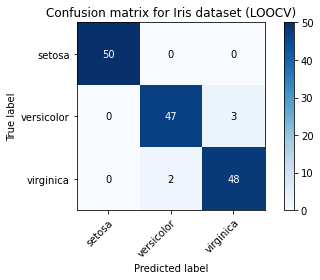

In [101]:

from sklearn.metrics import confusion_matrix


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

loo = LeaveOneOut()

model = LogisticRegression()

y_true = []
y_pred = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_true.append(y_test[0])
    y_pred.append(model.predict(X_test)[0])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=iris.target_names, yticklabels=iris.target_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion matrix for Iris dataset (LOOCV)')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In the above example, we computed a confusion matrix for the model's predictions on the Iris dataset, using LOOCV to evaluate the performance. We then plot the confusion matrix as a heatmap, with the true labels on the y-axis and the predicted labels on the x-axis. This can be a useful way to visualize the model's performance across different classes, and to identify any patterns of misclassification.

Accuracy: 90.00%
Confusion matrix:
 [[44.  6.]
 [ 4. 46.]]


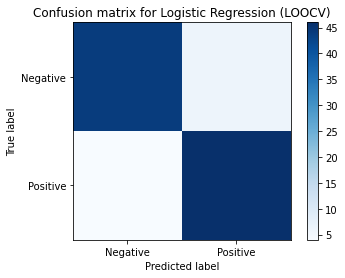

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, random_state=42)

# Define the model and the Leave-One-Out Cross Validation object
model = LogisticRegression(solver='lbfgs', max_iter=1000)
loo = LeaveOneOut()

# Initialize the confusion matrix
cm = np.zeros((2, 2))

# Loop over the LOO splits and train/test the model
for train_idx, test_idx in loo.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Update the confusion matrix
    cm[y_test, y_pred] += 1

# Compute the accuracy and display the confusion matrix
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion matrix:\n", cm)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix for Logistic Regression (LOOCV)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


In the above example, we generated a synthetic dataset and train a logistic regression model on it, using LOOCV to evaluate the performance. For each split, we compute the confusion matrix (the number of true positives, true negatives, false positives, and false negatives), and we accumulate the results over all splits. We then display the overall accuracy and the confusion matrix as a heatmap. This can be a useful way to visualize the model's performance and to identify any patterns in the errors that the model is making.